In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
sc.settings.verbosity = 0
from anndata import AnnData
import scipy
from numpy.linalg import svd


import warnings
warnings.filterwarnings("ignore")


In [2]:
try:
    from sys import path as syspath
    from os import path as ospath
    syspath.append(ospath.join(ospath.expanduser("~"), './'))
    
    #from pcNet import pcNet
    from main import *
    #import dNN 
    #from neighborhood import laplacian
except ImportError:
    print('Module not found')

In [3]:
ada = sc.read_h5ad("data/LS.h5ad")
ada

AnnData object with n_obs × n_vars = 5011 × 17328
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'patient.id', 'condition', 'labels', 'ident'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'

In [4]:
data = scipy.sparse.csr_matrix.toarray(ada.X)
counts = np.asarray(np.expm1(data), dtype=int)
ada.layers['raw'] = counts
ada.layers['log1p'] = data

In [5]:
HVG_i = np.argsort(np.asarray(ada.var['vst.variance.standardized']))[-3000:]
ada = ada[:, HVG_i].copy()
ada

AnnData object with n_obs × n_vars = 5011 × 3000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'patient.id', 'condition', 'labels', 'ident'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    layers: 'raw', 'log1p'

In [6]:
skin = Xct_metrics(ada)
type(skin)

main.Xct_metrics

In [7]:
skin.DB.head()

,ligand,receptor
0,BDNF,TRPC1
1,CXCL12,GNAI2
2,PF4,GNAI2
3,EPOR,TRPC3
4,EPOR,EPO


In [8]:
skin._genes_index_DB

array([[1194,    0],
       [2920,    0],
       [   0,    0],
       ...,
       [   0,    0],
       [   0,    0],
       [   0,    0]])

918 (intervals for fit) / 3000 (filtered -Inf) / 3000 (original) features for the fit


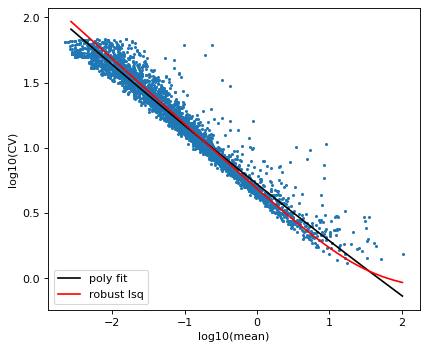

array([ 0.048889  , -0.07626458, -0.02784309, ...,  0.78019458,
        0.59314723,  0.22144539])

In [9]:
skin.chen2016_fit(ada, plot = True, verbose = True)

In [10]:
obj1 = Xct(ada, 'Inflam. FIB', 'Inflam. DC', RUNpcNet=True)
df1 = obj1.fill_metric()
df1

,ligand,receptor,mean_L,mean_R,var_L,var_R,disp_L,disp_R,cv_L,cv_R,cv_res_L,cv_res_R
21,IGF1,NTRK2,0.029522,0.024446,0.067410,0.027285,2.283343,1.116142,8.794479,6.757026,0.156436,-0.338065
31,AREG,NTRK2,0.003443,0.024446,0.005726,0.027285,1.663072,1.116142,21.977261,6.757026,-0.221117,-0.338065
36,FGF2,NTRK2,0.076530,0.024446,0.142827,0.027285,1.866276,1.116142,4.938230,6.757026,-0.075862,-0.338065
38,FGF7,NTRK2,0.449156,0.024446,0.835224,0.027285,1.859543,1.116142,2.034720,6.757026,0.023099,-0.338065
56,BDNF,NTRK2,0.009386,0.024446,0.016305,0.027285,1.737234,1.116142,13.604940,6.757026,-0.094830,-0.338065
...,...,...,...,...,...,...,...,...,...,...,...,...
7974,LAMB1,SV2B,0.192922,0.015761,0.356617,0.019873,1.848509,1.260899,3.095425,8.944272,-0.019347,-0.338065
7980,LAMC3,SV2B,0.343355,0.015761,0.610706,0.019873,1.778645,1.260899,2.276004,8.944272,-0.046932,-0.338065
7984,LAMB2,SV2B,1.027162,0.015761,1.343443,0.019873,1.307918,1.260899,1.128420,8.944272,-0.030466,-0.338065
8113,FSTL1,DIP2A,1.154967,0.066773,1.490066,0.086209,1.290138,1.291068,1.056898,4.397163,0.014484,-0.313400


In [11]:
obj1._net_A.shape, obj1._net_B.shape, obj1._w.shape

((3000, 3000), (3000, 3000), (6000, 6000))

In [12]:
#selected LR pairs
candidates = [a+'_'+b for a, b in zip(np.asarray(df1['ligand'],dtype=str), np.asarray(df1['receptor'],dtype=str))]
len(candidates)

160

Net(
  (linear1): Linear(in_features=484, out_features=124, bias=True)
  (linear2): Linear(in_features=124, out_features=31, bias=True)
  (linear3): Linear(in_features=31, out_features=2, bias=True)
)
Net(
  (linear1): Linear(in_features=81, out_features=48, bias=True)
  (linear2): Linear(in_features=48, out_features=12, bias=True)
  (linear3): Linear(in_features=12, out_features=2, bias=True)
)
0 4698.8232421875
100 400.5235595703125
200 325.7298583984375
300 239.3107452392578
400 177.91758728027344
500 162.26528930664062
600 150.29171752929688
700 148.41165161132812
800 137.0343475341797
900 148.4192657470703
1000 127.00245666503906
1100 136.01211547851562
1200 118.62393188476562
1300 119.2399673461914
1400 120.53225708007812
1500 118.99088287353516
1600 125.00253295898438
1700 109.76364135742188
1800 110.96172332763672
1900 114.00531768798828
2000 108.53489685058594
2100 104.4301986694336
2200 107.25914001464844
2300 104.14509582519531
2400 103.16535949707031
2500 99.50951385498047


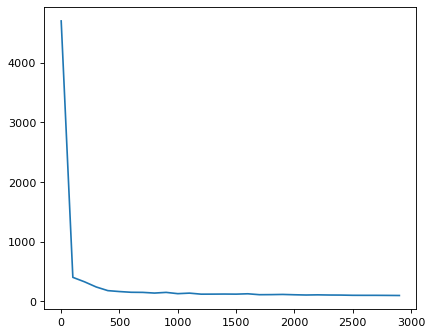

In [13]:
projections, losses = obj1.nn_projection(plot_loss = True)

In [14]:
#manifold alignment pair distances
result_nn = obj1.pair_distance(projections) #dict
print('manifold aligned pairs:', len(result_nn))


manifold aligned pairs: 9000000


In [15]:
#output df
df_nn = pd.DataFrame.from_dict(result_nn, orient='index', columns=['idx', 'dist']).sort_values(by=['dist'])
df_nn['rank'] = np.arange(len(df_nn))

w12 = obj1._w[:obj1._net_A.shape[0], obj1._net_A.shape[1]:]
print(w12.shape)
correspondence_score = [w12[idx] for idx in np.asarray(df_nn['idx'])]
#np.count_nonzero(np.asarray(correspondence_score))
df_nn['correspondence_score'] = correspondence_score
df_nn.head()

(3000, 3000)


,idx,dist,rank,correspondence_score
DCN_HLA-DPB1,"(2992, 2983)",0.000439,0,113545.711532
DCN_HLA-DPA1,"(2992, 2987)",0.000444,1,114503.584525
DCN_CD74,"(2992, 2991)",0.000457,2,190687.325452
COL6A3_HLA-DPB1,"(2819, 2983)",0.000460,3,99799.596712
COL6A3_HLA-DPA1,"(2819, 2987)",0.000466,4,100641.507315


[[ 1.         -0.17686447]
 [-0.17686447  1.        ]]


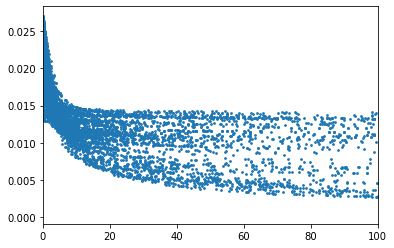

In [16]:
#check corr
select = df_nn['correspondence_score'] != 0
nX = np.asarray(df_nn['correspondence_score'][select])
nY = np.asarray(df_nn['dist'][select])
r = np.corrcoef(nX, nY)
print(r)

plt.scatter(nX, nY, s=3)
plt.xlim(0, 100)
plt.show()

In [17]:
#distance rank of L-R candidates
i = 0 
for p in candidates:
    if df_nn.loc[p].values[2] < 200: #rank < ?
        i += 1
        print(p, "idx, dist, rank, score, rank%:", ' '.join(map(str, df_nn.loc[p].values)), f'{round(100* df_nn.loc[p].values[2]/len(df_nn), 5)}%')

print('\nTotal enriched:', i)

CCL2_CXCR4 idx, dist, rank, score, rank%: (2820, 2548) 0.0006897841230966151 146 7621.785189064844 0.00162%
CXCL12_CXCR4 idx, dist, rank, score, rank%: (2919, 2548) 0.0006837776745669544 142 8023.881675573323 0.00158%
CCL19_CXCR4 idx, dist, rank, score, rank%: (2993, 2548) 0.0005793552845716476 50 14435.245117772507 0.00056%
CXCL14_CXCR4 idx, dist, rank, score, rank%: (2994, 2548) 0.0005849227891303599 53 14198.10450116181 0.00059%
CCL2_CCR7 idx, dist, rank, score, rank%: (2820, 2138) 0.0006584888324141502 119 10891.684103334594 0.00132%
CXCL12_CCR7 idx, dist, rank, score, rank%: (2919, 2138) 0.0006521482719108462 115 11466.288057850983 0.00128%
CCL19_CCR7 idx, dist, rank, score, rank%: (2993, 2138) 0.0005477624945342541 30 20628.25517603859 0.00033%
CXCL14_CCR7 idx, dist, rank, score, rank%: (2994, 2138) 0.000553401536308229 35 20289.376472411597 0.00039%

Total enriched: 8
